In [1]:
import scipy.io
import os
import re
import glob
import importlib

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import utils as util
import plotting as putil
import importlib

In [2]:
%matplotlib notebook
putil.set_sns_style(style='dark', min_fontsize=12)

In [3]:
rootdir = '/Volumes/Julie'
videodir = os.path.join(rootdir, 'courtship-videos')
# rootdir = '/mnt/sda/Videos'
assay='single_20mm_1x1'

sessionpaths = sorted(glob.glob(os.path.join(videodir, assay, '202*')), key=util.natsort)
len(sessionpaths)

67

# load saved matlab structs

In [4]:
ftdir = os.path.join( rootdir, 'analysis/FlyTracker')
#basedir = '/mnt/minerva/analysis/FlyTracker'
# matlab_src = '/home/julianarhee/Documents/projects/flytracker-analysis/overviews2/Ddata.mat'
matlab_src = os.path.join(ftdir, 'flytracker-matlab/overviews2/Ddata.mat')
# Set save dir
destdir = os.path.join(ftdir, 'figures')
if not os.path.exists(destdir):
    os.makedirs(destdir)
# set FIGID
figid = 'flytracker-matlab/overviews2/Ddata.mat'

In [5]:
# # load MAT
# mat = scipy.io.loadmat(matlab_src, simplify_cells=True)
# species_list = [k for k in mat.keys() if not k.startswith('__')]
# # assert len(species_list)==1, "Did not find unique struct name: %s" % str(struct_name)
# print("Found species in struct: {}".format(species_list))

In [6]:
bouts_fpath = os.path.join(ftdir, 'bouts.pkl')
bouts = pd.read_pickle(bouts_fpath) # encoding='latin1')
bouts.head()

,species,acquisition,Disengaged,copulation,level_4,boutnum,boutdur,All Wing Extensions,Putative Tap Events,Chasing,...,fg_body_ratio,contrast,dist_to_wall,dist_to_other,leg_dist,level_3,min_wing_ang,max_wing_ang,angle_between,facing_angle
0,mau,20220128-1516_mauR4_4do_gh,0.0,False,0,1.0,1.150,1.0,0.0,0.0,...,2.218111,0.225596,1.752001,13.093457,10.490695,0,0.057471,1.087247,1.824932,2.441036
1,mau,20220128-1516_mauR4_4do_gh,0.0,False,1,3.0,1.125,1.0,0.0,0.0,...,1.690128,0.218294,1.996175,13.139522,10.480900,0,0.125887,0.575673,1.582413,2.617510
2,mau,20220128-1516_mauR4_4do_gh,0.0,False,2,5.0,0.800,0.0,0.0,0.0,...,1.817396,0.207082,4.215794,4.849907,2.347096,0,0.080530,0.134817,2.400323,0.452090
3,mau,20220128-1516_mauR4_4do_gh,0.0,False,3,7.0,0.250,0.0,1.0,0.0,...,4.062264,0.208867,4.599199,2.957937,0.021178,0,0.082898,0.175348,2.995642,0.521262
4,mau,20220128-1516_mauR4_4do_gh,0.0,False,4,9.0,0.025,0.0,1.0,0.0,...,2.914865,0.213331,4.647056,2.854628,0.054126,0,0.080420,0.181953,2.971630,0.541993


In [7]:

behavior_names = ['All Wing Extensions', 'Putative Tap Events',
                  'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
                 ]

In [994]:
bouts['leg_dist_norm'] = bouts['leg_dist']/bouts['leg_dist'].max()
bouts['vel_norm'] = bouts['vel']/bouts['vel'].max()
bouts['boutdur_norm'] = bouts['boutdur']/bouts['boutdur'].max() #300 #bouts['boutdur'].max()

In [995]:
bouts['boutdur'].median()

0.7000000000000455

In [997]:
bouts['species'].unique()

array(['mau', 'mel', 'rsim', 'sant', 'yak'], dtype=object)

In [1686]:
curr_species = ['mau', 'mel'] #, 'sant', 'yak']

<IPython.core.display.Javascript object>


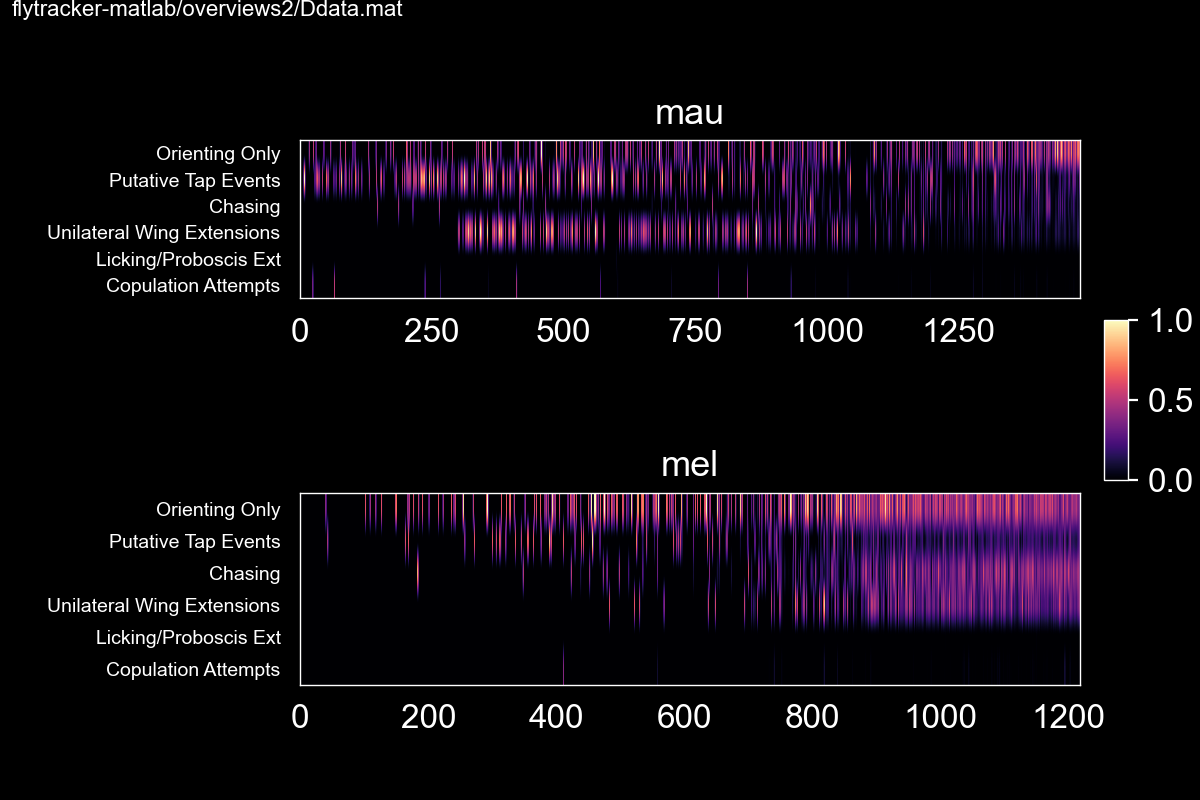

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_63398/3779491138.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ai, (sp, df_) in enumerate(plotdf.groupby(['species'])):


0
1


PermissionError: [Errno 13] Permission denied

In [1690]:
plot_behaviors = [
    #'Orienting', 
    'Orienting Only',  'Putative Tap Events', 
    'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts',
    #'leg_dist_norm', 'vel_norm'
]
curr_species = ['mau', 'mel'] #, 'santomea', 'yakuba']
n_species = len(curr_species)
plotdf = bouts[bouts['species'].isin(curr_species)].copy()
fig, axn = pl.subplots( n_species, 1,  figsize=(6,4))
for ai, (sp, df_) in enumerate(plotdf.groupby(['species'])):
    print(ai)
    ax=axn[ai]
    df_ = df_.copy().sort_values(by='boutdur')
    im = ax.imshow(df_[plot_behaviors].T, cmap='magma', vmin=0, vmax=1)
    ax.set_aspect(50)
    ax.set_title(sp)
    ax.set_yticks(np.arange(0, len(plot_behaviors), 1))
    ax.set_yticks(np.arange(-0.5, len(plot_behaviors), 1), minor=True)
    ax.set_yticklabels(plot_behaviors, fontsize=7) #[plot_behaviors[int(v)] if v%1==0 else '' for i, v in enumerate(np.arange(0, len(plot_behaviors), 0.5))], fontsize=7)
for ax in axn:
    ax.set_anchor('W')
    #ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

pl.subplots_adjust(left=0.25, right=0.9)
cbar_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
fig.colorbar(im, cax=cbar_ax)
pl.subplots_adjust(hspace=0.5)

putil.label_figure(fig, figid)
figname = 'events-by-bout_sort-boutdur_{}'.format('-'.join(curr_species))
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(destdir, figname)

<IPython.core.display.Javascript object>


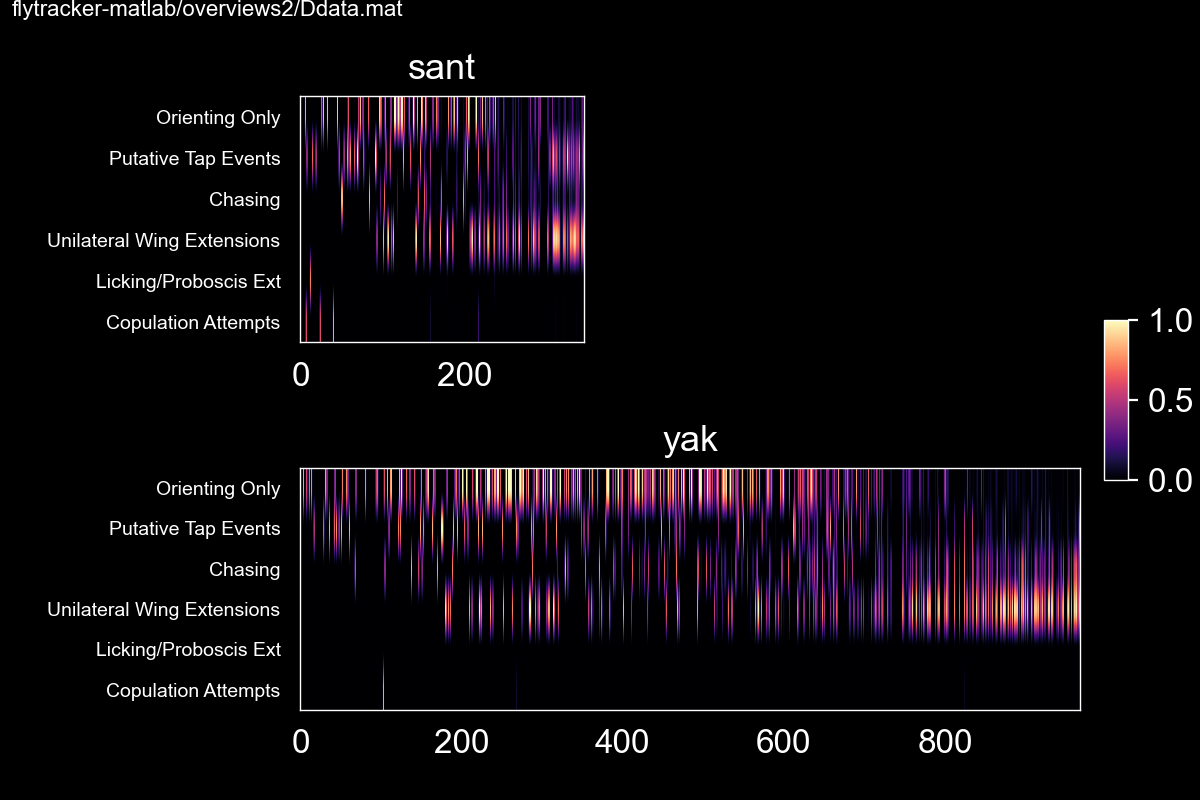

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_63398/172478453.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ai, (sp, df_) in enumerate(plotdf.groupby(['species'])):


0
1
/Volumes/Julie/analysis/FlyTracker/figures events-by-bout_sort-boutdur_sant-yak


In [1689]:
curr_species = [ 'sant', 'yak']
n_species = len(curr_species)
plotdf = bouts[bouts['species'].isin(curr_species)].copy()
fig, axn = pl.subplots( n_species, 1,  figsize=(6,4))
for ai, (sp, df_) in enumerate(plotdf.groupby(['species'])):
    print(ai)
    ax=axn[ai]
    df_ = df_.copy().sort_values(by='boutdur')
    im = ax.imshow(df_[plot_behaviors].T, cmap='magma', vmin=0, vmax=1)
    ax.set_aspect(50)
    ax.set_title(sp)
    ax.set_yticks(np.arange(0, len(plot_behaviors), 1))
    ax.set_yticks(np.arange(-0.5, len(plot_behaviors), 1), minor=True)
    ax.set_yticklabels(plot_behaviors, fontsize=7) #[plot_behaviors[int(v)] if v%1==0 else '' for i, v in enumerate(np.arange(0, len(plot_behaviors), 0.5))], fontsize=7)
for ax in axn:
    ax.set_anchor('W')
    #ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

pl.subplots_adjust(left=0.25, right=0.9)
cbar_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
fig.colorbar(im, cax=cbar_ax)
pl.subplots_adjust(hspace=0.5)

putil.label_figure(fig, figid)
figname = 'events-by-bout_sort-boutdur_{}'.format('-'.join(curr_species))
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(destdir, figname)

In [1331]:
nonbehavs = ['species', 'acquisition', 'Disengaged', 'copulation', 'level_4', 'level_3',
       'boutnum']
behavs = [ b for b in bouts.columns if b not in nonbehavs]
print(len(behavs))

25


In [1342]:
bouts[bouts['boutdur']>=1000]
curr_species = ['mau', 'mel', 'sant', 'yak']

In [1485]:
species_cmap = sns.color_palette('colorblind', n_colors=bouts[(bouts['copulation'])]['species'].nunique())
curr_species = sorted(bouts[(bouts['copulation'])]['species'].unique())
print(curr_species)
species_palette = dict((sp, col) for sp, col in zip(curr_species, species_cmap))

['mau', 'mel', 'sant', 'yak']


<IPython.core.display.Javascript object>


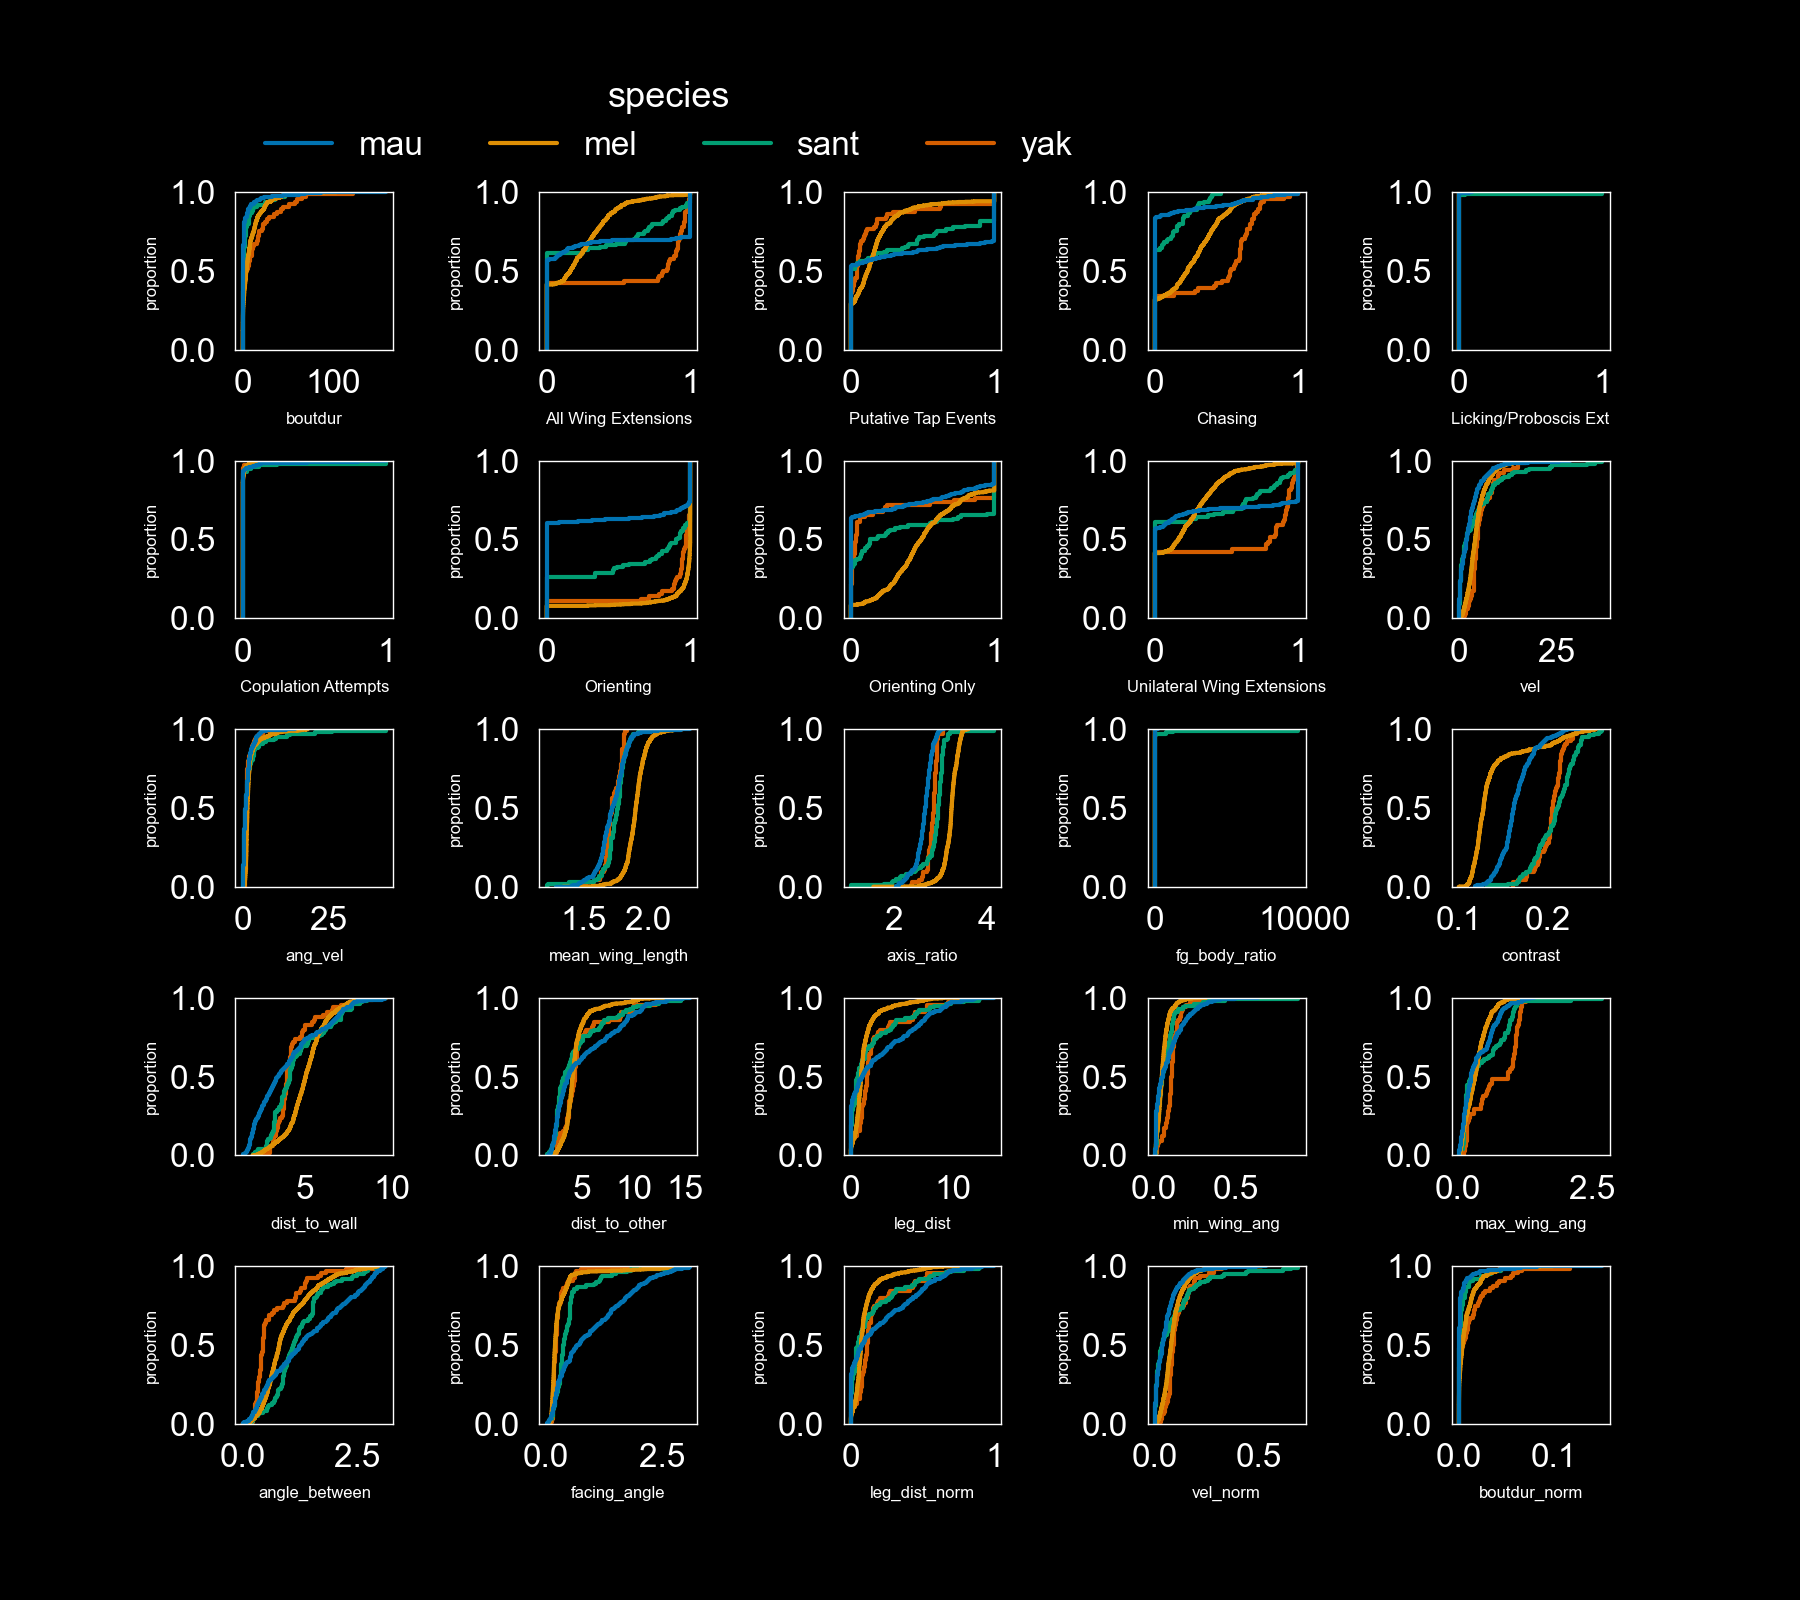

In [1494]:
plotdf = bouts[(bouts['species'].isin(curr_species)) 
               & (bouts['copulation'])
               & (bouts['Disengaged']==0)
              & (bouts['boutdur']<=1000)].copy()
fig, axn = pl.subplots(5, 5, figsize=(9,8))
for ai, b in enumerate(behavs):
    ax=axn.flat[ai]
    sns.ecdfplot(data=plotdf,
             x='{}'.format(b), hue='species', ax=ax, #bins=100,
             stat='proportion',
            palette=species_palette)
    ax.set_xlabel(b, fontsize=6)
    ax.set_ylabel('proportion', fontsize=6)
    ax.set_box_aspect(1)
    if ai==0:
        sns.move_legend(ax, loc='lower left', bbox_to_anchor=(0, 1), ncol=4, frameon=False)
    else:
        ax.legend_.remove()
#     sns.pointplot(data=plotdf
#                   x='species', y='axis_ratio', hue='Disengaged', ax=ax,
#                  dodge=True)
pl.subplots_adjust(wspace=0.7, hspace=0.7)

In [1325]:
6*5

30

# SVM

In [759]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [1000]:
bouts['leg_dist_norm'] = bouts['leg_dist']/bouts['leg_dist'].max()
bouts['vel_norm'] = bouts['vel']/bouts['vel'].max()
bouts['boutdur_norm'] = bouts['boutdur']/bouts['boutdur'].max() #300 #bouts['boutdur'].max()

In [1780]:
curr_species = ['mau', 'mel', 'sant', 'yak'] # 'sant', 'yak']

df0 = bouts[(bouts['species'].isin(curr_species))
          & (bouts['Disengaged']==0)].dropna().copy()

df = df0.copy() #groupby('species').sample(172)

# plot_behaviors = [
#     'Orienting',  'Putative Tap Events', 
#     'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts',
#     'leg_dist', 'vel', 'boutdur', 
# ]
print(df.columns)

plot_behaviors = ['vel', 'ang_vel', 'dist_to_other', 'max_wing_ang', #'min_wing_ang',
                  'facing_angle', 'boutdur', 'axis_ratio'] #,
#                   'Orienting Only'] #,
#                   'Unilateral Wing Extensions'] #, 'Chasing'] #, 'Copulation Attempts'] #,
print(len(plot_behaviors))
#     'Orienting',  'Putative Tap Events', 
#     'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts'
#                  ] #, 'Orienting', 'leg_dist']
# Create DF
col_vars = copy.copy(plot_behaviors)
col_vars.append('species')
print(col_vars)
X_df = df[col_vars].dropna().copy()

X = X_df[plot_behaviors].values
y = X_df['species'].values
class_names = curr_species

Index(['species', 'acquisition', 'Disengaged', 'copulation', 'level_4',
       'boutnum', 'boutdur', 'All Wing Extensions', 'Putative Tap Events',
       'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'Orienting Only', 'Unilateral Wing Extensions', 'vel', 'ang_vel',
       'mean_wing_length', 'axis_ratio', 'fg_body_ratio', 'contrast',
       'dist_to_wall', 'dist_to_other', 'leg_dist', 'level_3', 'min_wing_ang',
       'max_wing_ang', 'angle_between', 'facing_angle', 'leg_dist_norm',
       'vel_norm', 'boutdur_norm'],
      dtype='object')
7
['vel', 'ang_vel', 'dist_to_other', 'max_wing_ang', 'facing_angle', 'boutdur', 'axis_ratio', 'species']


In [1781]:
X_df[plot_behaviors].shape, df[plot_behaviors].dropna().shape

((2012, 7), (2012, 7))

In [1782]:
model = svm.LinearSVC()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1) #, scoring='roc_auc',
# summarize performance
#print('Mean ROC AUC: %.3f' % np.mean(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jul

0.73 accuracy with a standard deviation of 0.02


/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1783]:
bouts[bouts['species']=='mel'].groupby('Disengaged')['boutdur'].describe()

,count,mean,std,min,25%,50%,75%,max
Disengaged,,,,,,,,
0.0,616.0,8.669426,12.330289,0.0,0.51875,4.108333,12.162500,103.216667
1.0,602.0,0.349529,0.800812,0.0,0.01875,0.066667,0.383333,11.450000


In [1784]:
import itertools

#import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
import sklearn

In [1785]:
def evaluate_model(data_x, data_y):
    #k_fold = KFold(5, shuffle=True, random_state=0)
    #k_fold = StratifiedKFold(5, shuffle=True, random_state=0)
    k_fold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x, data_y): #k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # Fit the classifier
        classifier = svm.LinearSVC().fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets

In [1786]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    pl.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, 
                              title='Confusion matrix, without normalization')
    pl.show()

    # Plot normalized confusion matrix
    pl.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, 
                              normalize=True, title='Normalized confusion matrix')
    pl.show()

In [1787]:
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    pl.imshow(cnf_matrix, interpolation='nearest', cmap=pl.get_cmap('Blues'))
    pl.title(title)
    pl.colorbar()

    tick_marks = np.arange(len(classes))
    pl.xticks(tick_marks, classes, rotation=45)
    pl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        pl.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    pl.tight_layout()
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

    return cnf_matrix

In [1788]:
scaler = sklearn.preprocessing.StandardScaler()
X_sd = scaler.fit_transform(X)
#y_sd = X_sd = scaler.fit_transform(y)

In [1789]:
len(plot_behaviors)

7

In [1790]:
# sd_df = pd.DataFrame(data=X_sd, columns=plot_behaviors)
# sd_df['species'] = y
# fig, axn = pl.subplots(5, 3, figsize=(8,8))
# for ai, v in enumerate(plot_behaviors):
#     ax=axn.flat[ai]
#     sns.histplot(data=sd_df, x=v, ax=ax, hue='species', legend=0)
# pl.subplots_adjust(wspace=0.5, hspace=0.5)

In [1791]:
X_sd.shape

(2012, 7)

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jul

<IPython.core.display.Javascript object>


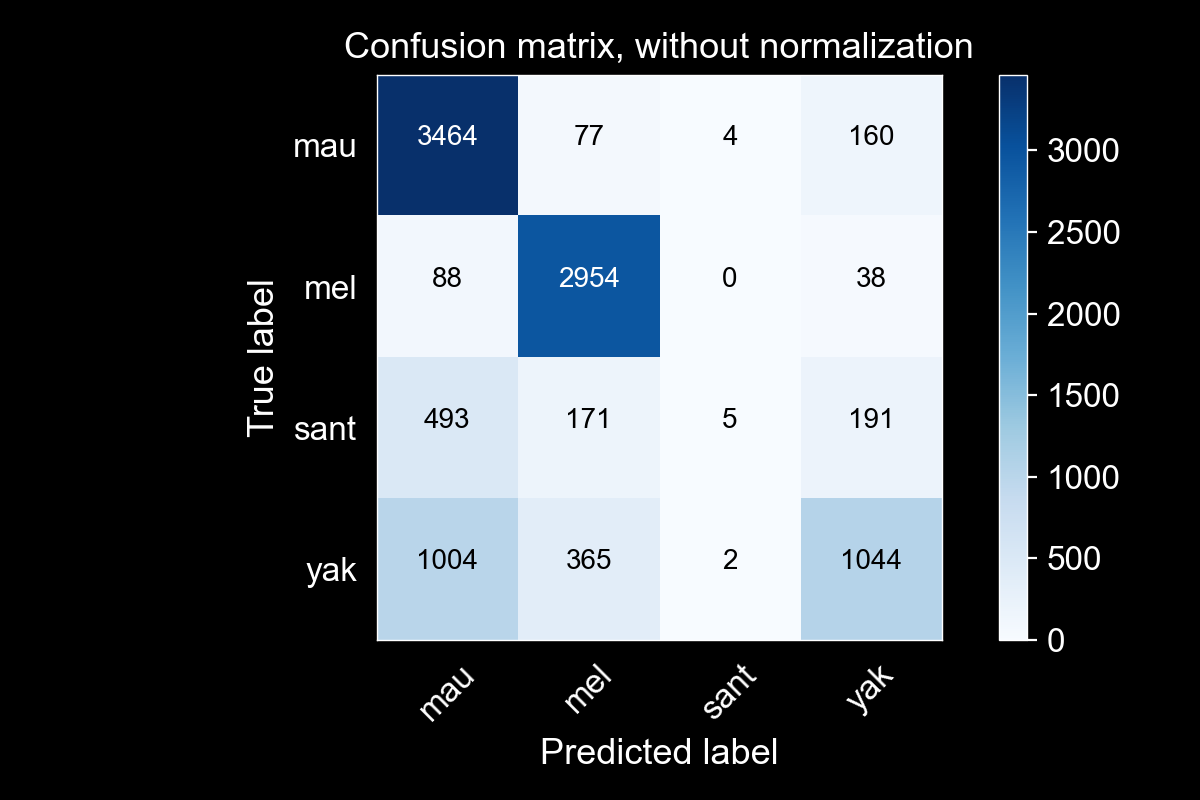

Confusion matrix, without normalization


<IPython.core.display.Javascript object>


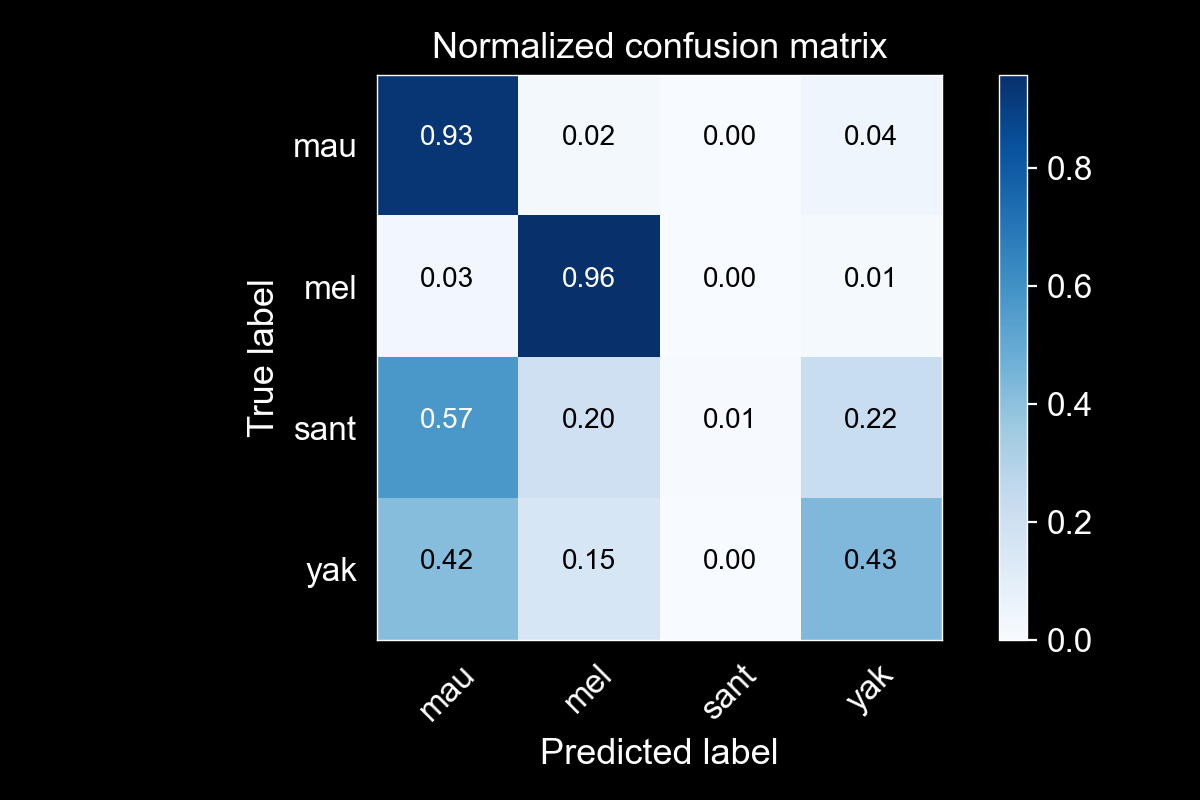

Normalized confusion matrix


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Julie/analysis/FlyTracker/figures/confusion-mat_w-norm.png'

In [1792]:
predicted_target, actual_target = evaluate_model(X_sd, y)
#plot_confusion_matrix(predicted_target, actual_target)
cnf_matrix = confusion_matrix(actual_target, predicted_target)
np.set_printoptions(precision=2)

pl.figure()
generate_confusion_matrix(cnf_matrix, classes=class_names, 
                          title='Confusion matrix, without normalization')
pl.subplots_adjust(bottom=0.2)
#pl.savefig(os.path.join(destdir, 'confusion-mat_wo-norm.png'))

pl.figure()
generate_confusion_matrix(cnf_matrix, classes=class_names, 
                          normalize=True, title='Normalized confusion matrix')
pl.subplots_adjust(bottom=0.2)
pl.savefig(os.path.join(destdir, 'confusion-mat_w-norm.png'))

In [1793]:
X = X_df[plot_behaviors].values
y = X_df['species'].values
class_names = curr_species
feature_names = plot_behaviors
scaler = sklearn.preprocessing.StandardScaler()
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.33, stratify=y, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = sklearn.svm.LinearSVC(C=1.0,random_state=42 ) #.fit(X_train, y_train) #, y_train)
#clf = svm.SVC(decision_function_shape='ovr', kernel='linear')
#X_train = clf.predict(X_train)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<IPython.core.display.Javascript object>


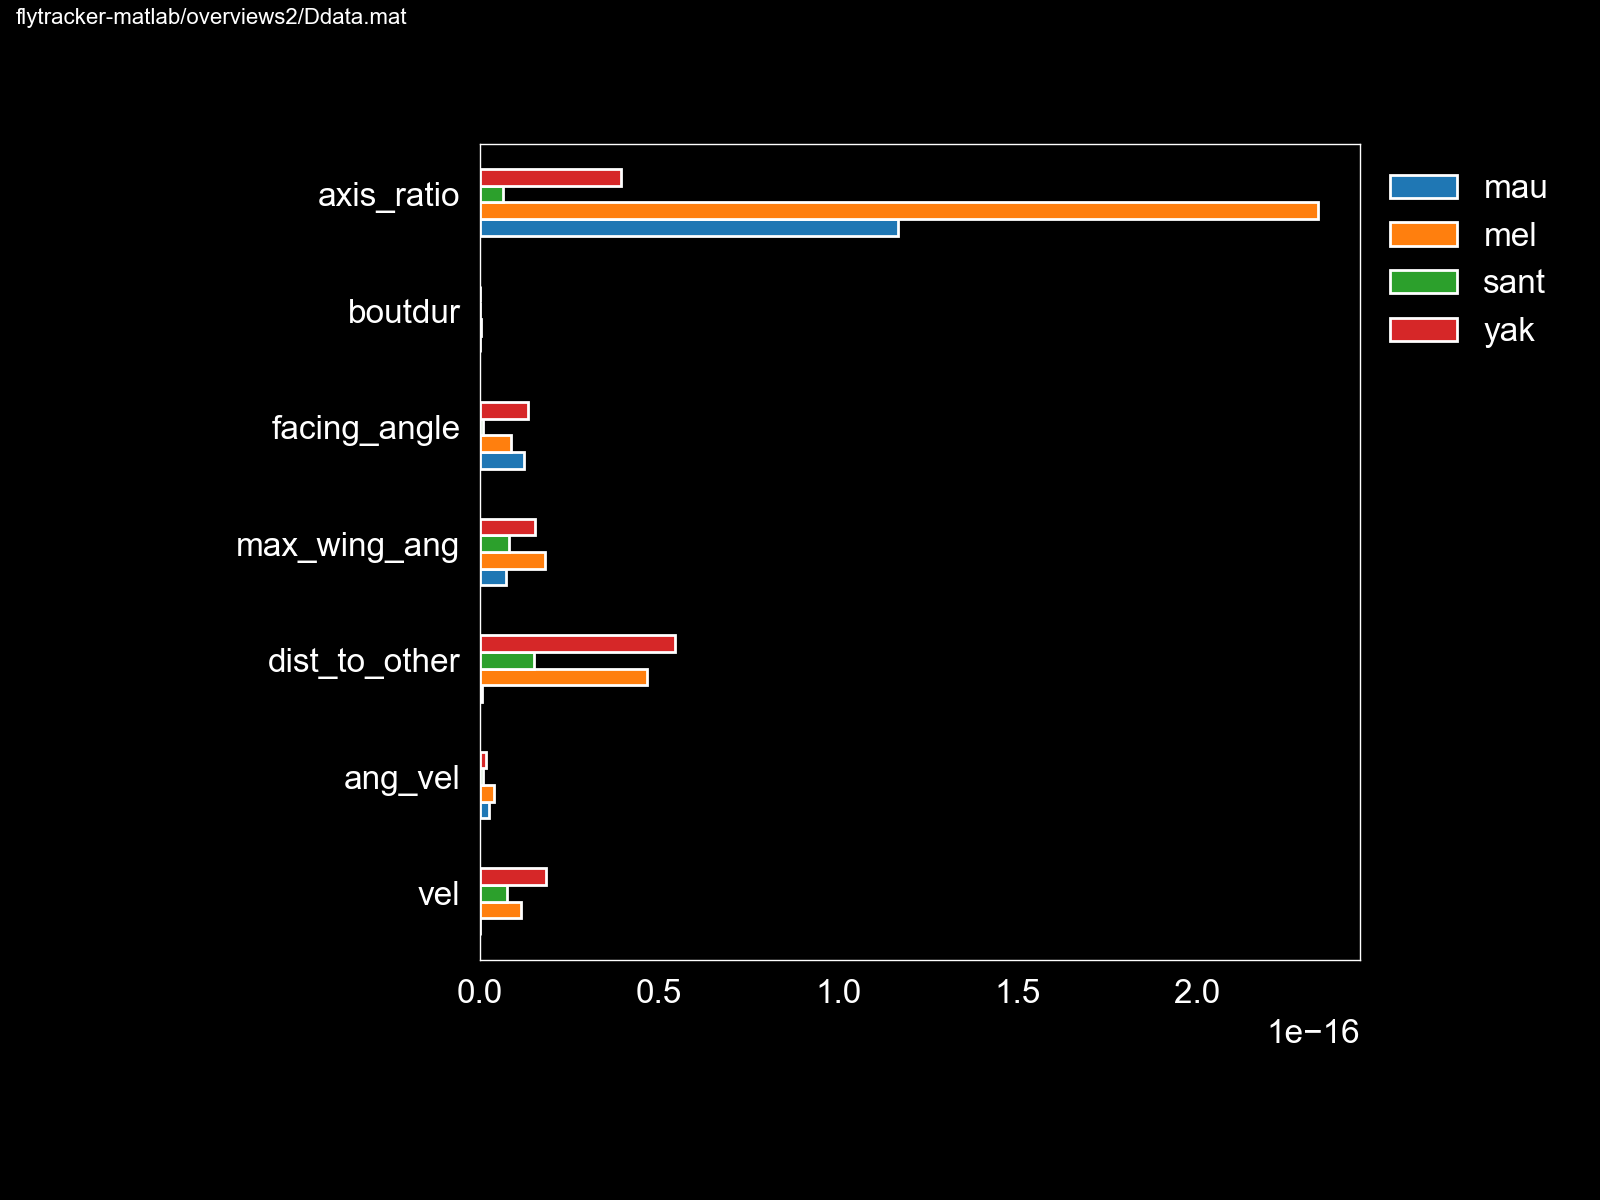

top 5 keywords per class:
             mau            mel           sant            yak
0     axis_ratio     axis_ratio  dist_to_other  dist_to_other
1   facing_angle  dist_to_other   max_wing_ang     axis_ratio
2   max_wing_ang   max_wing_ang            vel            vel
3        ang_vel            vel     axis_ratio   max_wing_ang
4  dist_to_other   facing_angle        ang_vel   facing_angle
5        boutdur        ang_vel   facing_angle        ang_vel
6            vel        boutdur        boutdur        boutdur


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Julie/analysis/FlyTracker/figures/svm-weights.png'

In [1794]:
feature_names = np.array(plot_behaviors) # ordered array of feature nanmes
target_names = clf.classes_

average_feature_effects = abs(clf.coef_) * abs(np.asarray(X_sd.mean(axis=0)).ravel())
#average_feature_effects = abs(clf.coef_) * X_train_preprocessed.std(axis=0).ravel()

for i, label in enumerate(target_names):
    top5 = np.argsort(average_feature_effects[i])[-10:][::-1]
    if i == 0:
        top = pd.DataFrame(feature_names[top5], columns=[label])
        top_indices = top5
    else:
        top[label] = feature_names[top5]
        top_indices = np.concatenate((top_indices, top5), axis=None)
top_indices = np.unique(top_indices)
predictive_words = feature_names[top_indices]

# plot feature effects
bar_size = 0.25
padding = 0.75
y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

fig, ax = pl.subplots(figsize=(8, 6))
for i, label in enumerate(target_names):
    ax.barh(
        y_locs + (i - 2) * bar_size,
        average_feature_effects[i, top_indices],
        height=bar_size,
        label=label,
    )
ax.set(
    yticks=y_locs,
    yticklabels=predictive_words,
    ylim=[
        0 - 4 * bar_size,
        len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
    ],
)
ax.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)
pl.subplots_adjust(left=0.3, right=0.85)

print("top 5 keywords per class:")
print(top)

putil.label_figure(fig, figid)
pl.subplots_adjust(bottom=0.2)
pl.savefig(os.path.join(destdir, 'svm-weights.png'))

In [1655]:
import copy

In [1656]:
data_x = copy.copy(X_sd)
data_y = copy.copy(y)

k_fold = StratifiedKFold(10, shuffle=True, random_state=0)

predicted_targets = [] #np.array([])
actual_targets = [] #np.array([])
clfs=[]
avg_feats=[]
for i, (train_ix, test_ix) in enumerate(k_fold.split(data_x, data_y)): #k_fold.split(data_x):
    train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

    # Fit the classifier
    #classifier = svm.SVC(C=1.0, kernel='linear').fit(train_x, train_y)
    clf = sklearn.svm.LinearSVC(C=1.0).fit(train_x, train_y)
    # Predict the labels of the test set samples
    predicted_labels = clf.predict(test_x)
    #print(i, train_ix, len(test_y[test_y=='sant']))
#     predicted_targets = np.append(predicted_targets, predicted_labels)
#     actual_targets = np.append(actual_targets, test_y)
    predicted_targets.append(predicted_labels)
    actual_targets.append(test_y)
    
    average_feature_effects = abs(clf.coef_) * np.asarray(train_x.mean(axis=0)).ravel()

    clfs.append(clf)
    avg_feats.append(average_feature_effects)

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jul

In [1657]:
cnf_=[]
cnf_normed_=[]
for predicted, actual in zip(predicted_targets, actual_targets):
    cnf_matrix_ = confusion_matrix(actual, predicted)
    cnf_.append(cnf_matrix_)
    cnf_matrix_normed_ = cnf_matrix_.astype('float') / cnf_matrix_.sum(axis=1)[:, np.newaxis]
    cnf_normed_.append(cnf_matrix_normed_)

cnf_normed_ = np.array(cnf_normed_)
cnf_normed_mean = cnf_normed_.mean(axis=0)
#cnf_normed_mean
cnf_normed_mean

array([[0.93, 0.01, 0.  , 0.05],
       [0.03, 0.96, 0.  , 0.01],
       [0.61, 0.2 , 0.01, 0.18],
       [0.39, 0.17, 0.  , 0.45]])

In [1658]:
class_names = clfs[0].classes_
print(len(plot_behaviors), clf.coef_.shape)

10 (4, 10)


In [1659]:
df_list = []
for ci, clf in enumerate(clfs):
    print(len(plot_behaviors), clf.coef_.shape)
    df_ = pd.DataFrame(data=clf.coef_, columns=plot_behaviors, index=clf.classes_)
    df_['fold'] = ci
    df_list.append(df_)
clfdf = pd.concat(df_list, axis=0)
clfdf = clfdf.reset_index().rename(columns={'index': 'species'})
clfdf

10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)
10 (4, 10)


,species,vel,ang_vel,dist_to_other,facing_angle,boutdur,axis_ratio,Orienting Only,Unilateral Wing Extensions,Chasing,Copulation Attempts,fold
0,mau,-0.041144,-0.214044,0.013816,0.154068,0.000044,-0.556138,-0.055495,-0.101648,-0.083799,-0.063037,0
1,mel,-0.041312,0.220664,-0.153040,0.121369,0.045882,1.201080,0.038949,-0.184003,0.110126,0.121642,0
2,sant,0.007882,0.033286,-0.059038,-0.037749,0.062668,-0.055729,0.019516,0.098018,-0.041779,0.017415,0
3,yak,0.131502,-0.111509,0.152477,-0.234566,-0.034740,-0.202416,-0.000804,0.112875,0.009808,-0.002285,0
4,mau,-0.078530,-0.208252,0.033447,0.182710,0.019253,-0.557136,-0.062157,-0.132842,-0.063324,-0.067719,1
5,mel,-0.032977,0.309915,-0.166981,0.043618,0.031991,1.160694,0.072946,-0.171916,0.113594,0.131258,1
6,sant,0.014037,0.013567,-0.078864,-0.046079,0.008169,-0.054897,0.019881,0.115867,-0.050017,0.008676,1
7,yak,0.147290,-0.153389,0.142522,-0.240633,-0.037801,-0.188993,-0.007167,0.126107,0.007722,0.012420,1
8,mau,-0.082319,-0.182582,0.022129,0.191494,0.004823,-0.556590,-0.033662,-0.111546,-0.059766,-0.063645,2
9,mel,-0.037949,0.216779,-0.133744,0.087413,0.034081,1.204611,0.068397,-0.162586,0.122999,0.136100,2


In [1660]:
clf.coef_

array([[-0.04, -0.23,  0.01,  0.18,  0.  , -0.57, -0.04, -0.12, -0.08,
        -0.06],
       [-0.05,  0.23, -0.13,  0.13,  0.03,  1.12,  0.08, -0.17,  0.15,
         0.1 ],
       [ 0.01,  0.04, -0.08, -0.04,  0.06, -0.06,  0.02,  0.1 , -0.04,
         0.01],
       [ 0.14, -0.13,  0.15, -0.25, -0.03, -0.18, -0.02,  0.14, -0.  ,
         0.01]])

In [1661]:
clfdf.groupby('species').mean()


,vel,ang_vel,dist_to_other,facing_angle,boutdur,axis_ratio,Orienting Only,Unilateral Wing Extensions,Chasing,Copulation Attempts,fold
species,,,,,,,,,,,
mau,-0.054672,-0.209128,0.020516,0.179296,0.006039,-0.552318,-0.045428,-0.113198,-0.073033,-0.063624,4.5
mel,-0.049677,0.231310,-0.145240,0.116339,0.041968,1.151114,0.067889,-0.168280,0.129282,0.120687,4.5
sant,0.010834,0.026551,-0.071493,-0.039093,0.045289,-0.055801,0.022486,0.103904,-0.045962,0.011838,4.5
yak,0.138662,-0.135911,0.146513,-0.255551,-0.058640,-0.192652,-0.014631,0.125564,0.006826,-0.051142,4.5


In [1662]:
clfdf_mean = clfdf.groupby('species').mean().reset_index()

#imp,names = zip([clf[0].coef_, feature_names])
for ai, (sp, d_) in enumerate(clfdf_mean.groupby('species')):
    ai

In [1663]:
clfdf_mean[plot_behaviors].values.ravel()

array([-0.05, -0.21,  0.02,  0.18,  0.01, -0.55, -0.05, -0.11, -0.07,
       -0.06, -0.05,  0.23, -0.15,  0.12,  0.04,  1.15,  0.07, -0.17,
        0.13,  0.12,  0.01,  0.03, -0.07, -0.04,  0.05, -0.06,  0.02,
        0.1 , -0.05,  0.01,  0.14, -0.14,  0.15, -0.26, -0.06, -0.19,
       -0.01,  0.13,  0.01, -0.05])

In [1664]:
# wts = np.matmul(clf[0].dual_coef_,clf[0].support_vectors_)
# wts.shape

In [1665]:
# f_importances(clf[0].coef_, feature_names)

In [1666]:
d_[plot_behaviors].values[0]

array([ 0.14, -0.14,  0.15, -0.26, -0.06, -0.19, -0.01,  0.13,  0.01,
       -0.05])

<IPython.core.display.Javascript object>


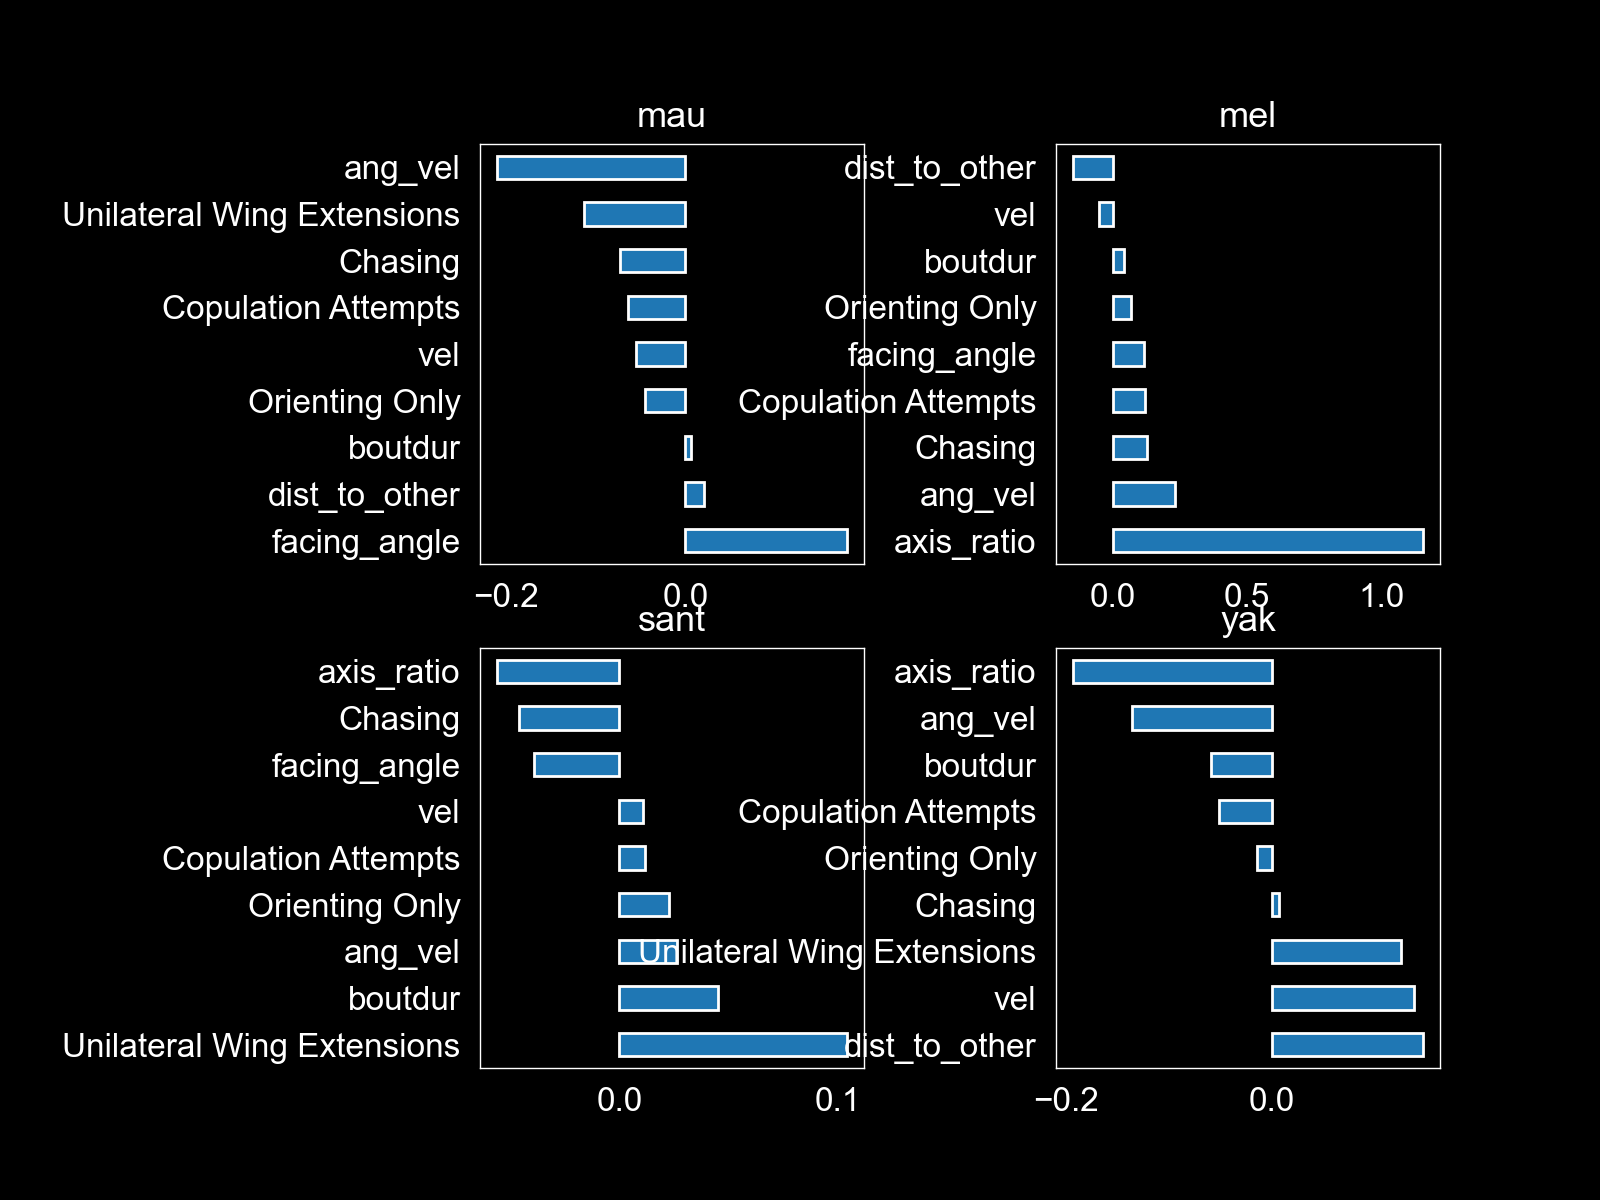

In [1667]:
fig, axn = pl.subplots(2,2, figsize=(8,6) )#, sharex=True, sharey=True)
for ai, (sp, d_) in enumerate(clfdf_mean.groupby('species')):
    ax=axn.flat[ai]
    vs = (d_[plot_behaviors].values[0])
    #vs = abs(clfs[0].coef_[0])
    pd.Series(vs, index=plot_behaviors).nlargest(9).plot(kind='barh', ax=ax)
    ax.set_title(sp)
pl.subplots_adjust(left=0.3, wspace=0.5, right=0.9)

In [1669]:
average_feature_effects.shape

(4, 10)

In [1670]:
avg_feats = np.array(avg_feats)
avg_feats.shape

(10, 4, 10)

<IPython.core.display.Javascript object>


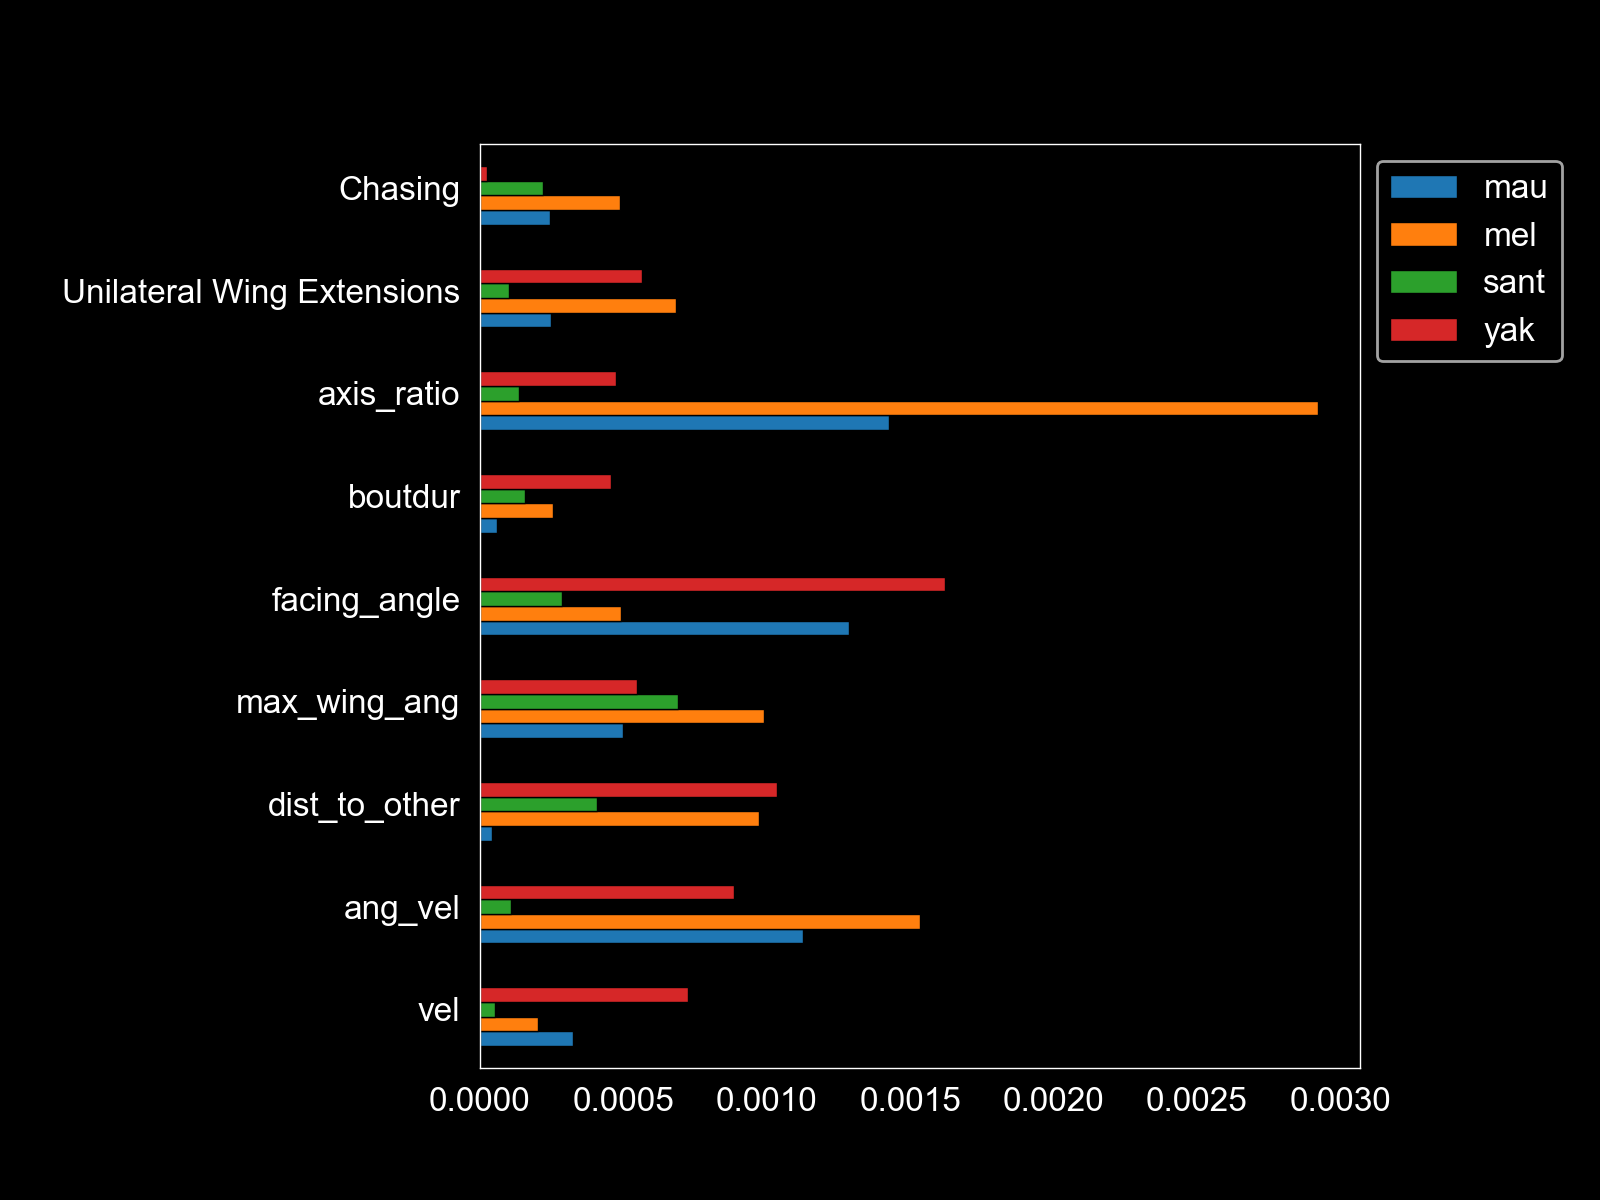

top 5 keywords per class:
            mau                         mel           sant  \
0    axis_ratio                  axis_ratio   max_wing_ang   
1  facing_angle                     ang_vel  dist_to_other   
2       ang_vel                max_wing_ang   facing_angle   
3  max_wing_ang               dist_to_other        Chasing   
4           vel  Unilateral Wing Extensions        boutdur   

                          yak  
0                facing_angle  
1               dist_to_other  
2                     ang_vel  
3                         vel  
4  Unilateral Wing Extensions  


In [1616]:
feature_names = np.array(plot_behaviors) # ordered array of feature nanmes
target_names = clf.classes_

average_feature_effects = abs(avg_feats).mean(axis=0) #abs(clf.coef_) * np.asarray(X_sd.mean(axis=0)).ravel()
#average_feature_effects = abs(clf.coef_) * X_train_preprocessed.std(axis=0).ravel()

for i, label in enumerate(target_names):
    top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
    if i == 0:
        top = pd.DataFrame(feature_names[top5], columns=[label])
        top_indices = top5
    else:
        top[label] = feature_names[top5]
        top_indices = np.concatenate((top_indices, top5), axis=None)
top_indices = np.unique(top_indices)
predictive_words = feature_names[top_indices]

# plot feature effects
bar_size = 0.25
padding = 0.75
y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

fig, ax = pl.subplots(figsize=(8, 6))
for i, label in enumerate(target_names):
    ax.barh(
        y_locs + (i - 2) * bar_size,
        average_feature_effects[i, top_indices],
        height=bar_size,
        label=label, lw=0.5, edgecolor='k'
    )
ax.set(
    yticks=y_locs,
    yticklabels=predictive_words,
    ylim=[
        0 - 4 * bar_size,
        len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
    ],
)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
pl.subplots_adjust(left=0.3, right=0.85)

print("top 5 keywords per class:")
print(top)


# Sorted features

In [1396]:
import numpy as np
import pandas as pd


def plot_feature_effects(clf, X_train):
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax

In [1468]:
curr_species = ['mau', 'mel', 'sant', 'yak'] # 'sant', 'yak']
df0 = bouts[(bouts['species'].isin(curr_species))
          & (bouts['Disengaged']==0)].dropna().copy()
df = df0.copy() #groupby('species').sample(172)
print(df.columns)

plot_behaviors = ['vel', 'ang_vel', 'dist_to_other', 'leg_dist', 'max_wing_ang', 'min_wing_ang',
                  'angle_between', 'facing_angle', 'boutdur',
                 'axis_ratio', 'mean_wing_length', 'Unilateral Wing Extensions'] #, #'axis_ratio',
#     'Orienting',  'Putative Tap Events', 
#     'Chasing', 'Unilateral Wing Extensions',  'Licking/Proboscis Ext', 'Copulation Attempts'
#                  ] 
# Create DF
col_vars = copy.copy(plot_behaviors)
col_vars.append('species')
print(col_vars)
X_df = df[col_vars].dropna().copy()

Index(['species', 'acquisition', 'Disengaged', 'copulation', 'level_4',
       'boutnum', 'boutdur', 'All Wing Extensions', 'Putative Tap Events',
       'Chasing', 'Licking/Proboscis Ext', 'Copulation Attempts', 'Orienting',
       'Orienting Only', 'Unilateral Wing Extensions', 'vel', 'ang_vel',
       'mean_wing_length', 'axis_ratio', 'fg_body_ratio', 'contrast',
       'dist_to_wall', 'dist_to_other', 'leg_dist', 'level_3', 'min_wing_ang',
       'max_wing_ang', 'angle_between', 'facing_angle', 'leg_dist_norm',
       'vel_norm', 'boutdur_norm'],
      dtype='object')
['vel', 'ang_vel', 'dist_to_other', 'leg_dist', 'max_wing_ang', 'min_wing_ang', 'angle_between', 'facing_angle', 'boutdur', 'axis_ratio', 'mean_wing_length', 'Unilateral Wing Extensions', 'species']


In [1469]:
X = X_df[plot_behaviors].values
y = X_df['species'].values
class_names = curr_species
feature_names = plot_behaviors
scaler = sklearn.preprocessing.StandardScaler()
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.33, stratify=y, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = sklearn.svm.LinearSVC(C=1.0) #.fit(X_train, y_train) #, y_train)
#clf = svm.SVC(decision_function_shape='ovr', kernel='linear')
#X_train = clf.predict(X_train)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)


/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [1470]:
X_test.shape, pred.shape

((664, 12), (664,))

<IPython.core.display.Javascript object>


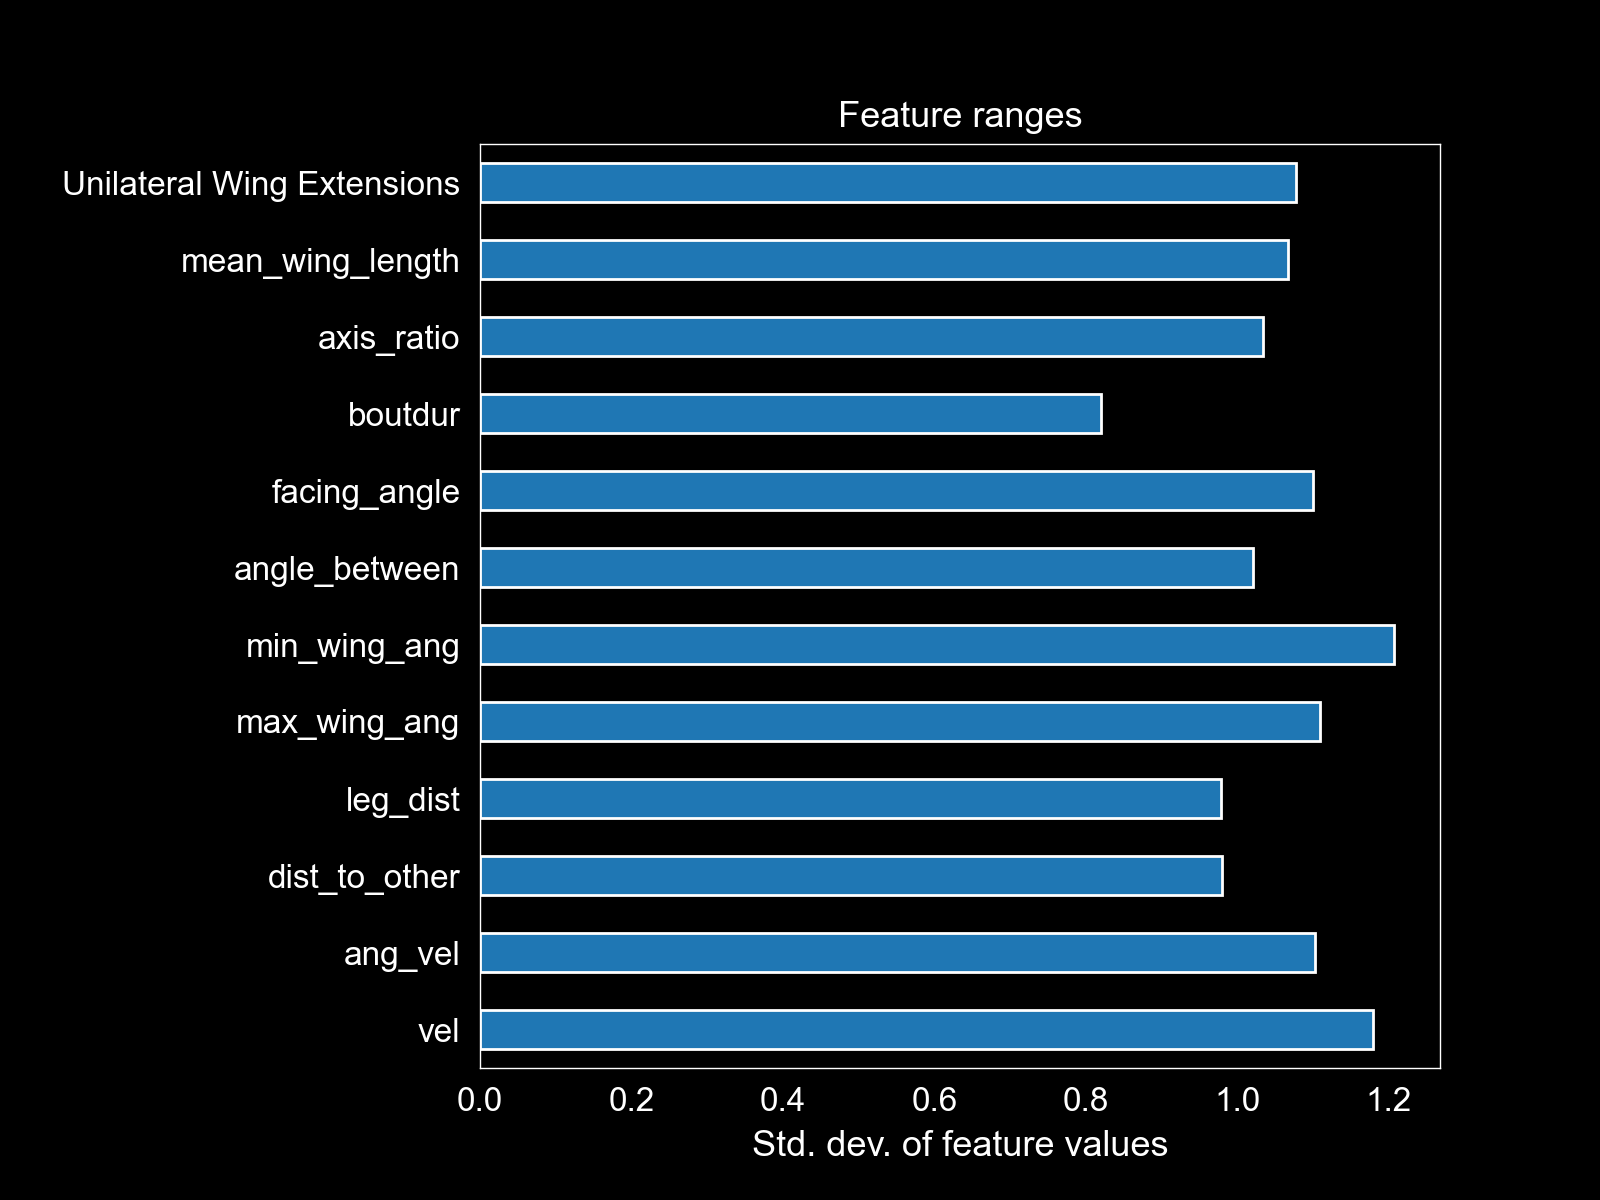

In [1471]:
X_train_preprocessed = pd.DataFrame(
    X_test, columns=feature_names
)
fig, ax =pl.subplots()

X_train_preprocessed.std(axis=0).plot.barh(figsize=(8, 6))
pl.title("Feature ranges")
pl.xlabel("Std. dev. of feature values")
pl.subplots_adjust(left=0.3)
pl.show()

<IPython.core.display.Javascript object>


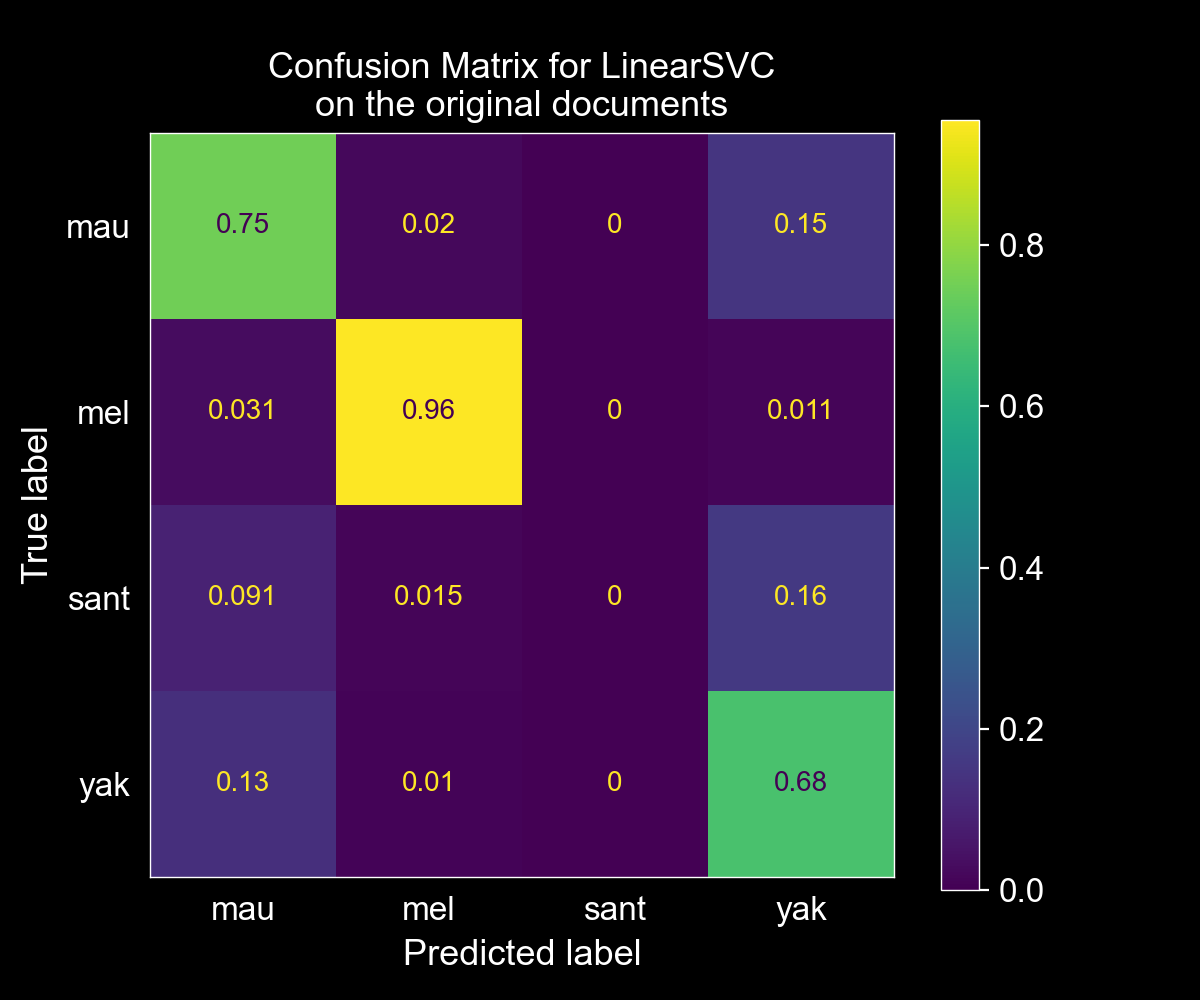

In [1472]:
target_names = clf.classes_

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = pl.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, normalize='pred')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

In [1475]:
feature_names = np.array(plot_behaviors) # ordered array of feature nanmes
feature_names

array(['vel', 'ang_vel', 'dist_to_other', 'leg_dist', 'max_wing_ang',
       'min_wing_ang', 'angle_between', 'facing_angle', 'boutdur',
       'axis_ratio', 'mean_wing_length', 'Unilateral Wing Extensions'],
      dtype='<U26')

In [1476]:
X_train_preprocessed.std(axis=0).shape, clf.coef_.shape

((12,), (4, 12))

In [1477]:
feature_names = np.array(plot_behaviors) # ordered array of feature nanmes
target_names = clf.classes_

average_feature_effects = abs(clf.coef_) * np.asarray(X_train.mean(axis=0)).ravel()
#average_feature_effects = abs(clf.coef_) * X_train_preprocessed.std(axis=0).ravel()

for i, label in enumerate(target_names):
    top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
    if i == 0:
        top = pd.DataFrame(feature_names[top5], columns=[label])
        top_indices = top5
    else:
        top[label] = feature_names[top5]
        top_indices = np.concatenate((top_indices, top5), axis=None)
top_indices = np.unique(top_indices)
predictive_words = feature_names[top_indices]

# _ = plot_feature_effects(clf, X_train).set_title("Average feature effect on the original data")
    # learned coefficients weighted by frequency of appearance

for i, label in enumerate(target_names):
    top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
    if i == 0:
        top = pd.DataFrame(feature_names[top5], columns=[label])
        top_indices = top5
    else:
        top[label] = feature_names[top5]
        top_indices = np.concatenate((top_indices, top5), axis=None)
top_indices = np.unique(top_indices)
predictive_words = feature_names[top_indices]

# plot feature effects
bar_size = 0.25
padding = 0.75
y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

fig, ax = pl.subplots(figsize=(8, 6))
for i, label in enumerate(target_names):
    ax.barh(
        y_locs + (i - 2) * bar_size,
        average_feature_effects[i, top_indices],
        height=bar_size,
        label=label,
    )
ax.set(
    yticks=y_locs,
    yticklabels=predictive_words,
    ylim=[
        0 - 4 * bar_size,
        len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
    ],
)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
pl.subplots_adjust(left=0.3, right=0.85)

print("top 5 keywords per class:")
print(top)


<IPython.core.display.Javascript object>


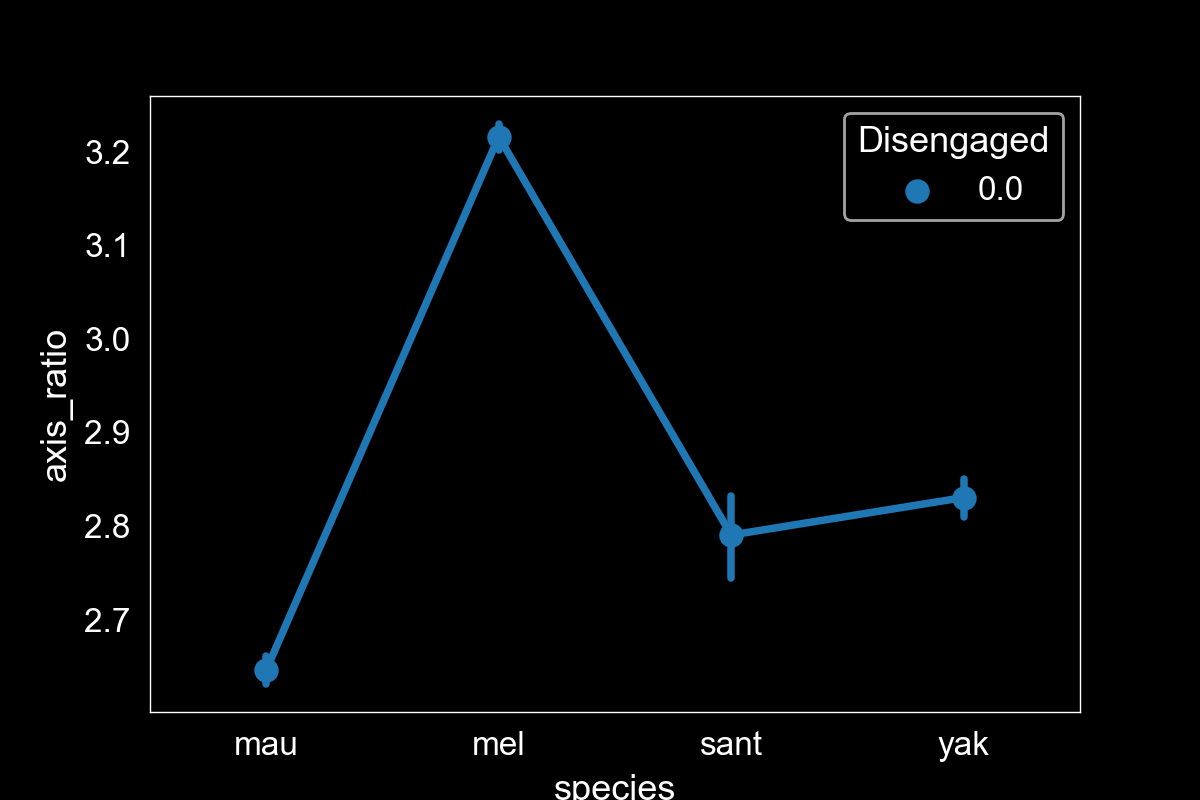

<AxesSubplot: xlabel='species', ylabel='axis_ratio'>

In [1447]:
fig, ax = pl.subplots()
# sns.stripplot(data=bouts, x='species', y='boutdur', hue='Disengaged', ax=ax,
#              dodge=True)
sns.pointplot(data=bouts[(bouts['species'].isin(curr_species)) & (bouts['Disengaged']==0)], 
              x='species', y='axis_ratio', hue='Disengaged', ax=ax,
             dodge=True)
#pl.savefig(os.path.join(destdir, 'engaged-v-axisratio.png'))

In [1430]:
from sklearn.model_selection import RepeatedKFold, cross_validate

#cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

cv_model = cross_validate(
    clf,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)


coefs = pd.DataFrame(
    [
        #est.coef_ * est.transform(X.iloc[train_idx]).std(axis=0)
        (est.coef_.T* np.dot(X[train_idx], clf.coef_[:n_comp].T).std(axis=0)).T
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/julianarhee/miniforge3/envs/plume/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jul

ValueError: operands could not be broadcast together with shapes (11,4) (3,) 

In [1298]:
n_comp = len(clf.classes_)
print(n_comp)
transf = np.dot(X, clf.coef_[:n_comp].T)
transf.shape

3


(1840, 3)

In [1319]:
est.coef_.T* np.dot(X[train_idx], clf.coef_[:n_comp].T).std(axis=0)

array([[-5.18e-03, -2.59e-02,  3.61e-02],
       [-1.23e-01,  1.91e-01, -1.38e-02],
       [ 4.90e-02,  1.01e+00, -8.53e-01],
       [-3.59e-02, -1.08e+00,  8.33e-01],
       [-6.15e-01, -8.51e-01,  1.34e+00],
       [ 3.78e+00, -1.29e+00, -5.44e+00],
       [-7.00e-02,  6.59e-02,  5.15e-02],
       [ 8.61e-02, -5.52e-02, -1.20e-01],
       [ 2.28e-01,  6.67e-02, -5.62e-01],
       [-1.55e-03,  1.03e-02, -8.80e-03],
       [-1.62e+00,  2.57e+00,  6.83e-01],
       [ 1.07e+00,  3.55e+00, -4.07e+00],
       [ 1.03e-01, -3.12e-01,  1.62e-01]])

In [1309]:
transf.std(axis=0).T.shape

(3,)

In [1311]:
clf.coef_*transf.std(axis=0).T

ValueError: operands could not be broadcast together with shapes (3,13) (3,) 

In [1243]:
from sklearn.inspection import permutation_importance

In [743]:
perm_importance = permutation_importance(clfs[6], test_x, test_y)
perm_importance

{'importances_mean': array([ 3.24e-02,  5.88e-02,  7.35e-02,  8.53e-02,  8.53e-02,  1.18e-02,
        -1.47e-02,  2.65e-02, -2.22e-17,  2.71e-01, -5.88e-03]),
 'importances_std': array([0.01, 0.02, 0.03, 0.04, 0.01, 0.02, 0.02, 0.01, 0.02, 0.04, 0.03]),
 'importances': array([[ 0.04,  0.04,  0.01,  0.01,  0.04],
        [ 0.09,  0.04,  0.03,  0.04,  0.09],
        [ 0.03,  0.12,  0.04,  0.1 ,  0.07],
        [ 0.15,  0.09,  0.03,  0.06,  0.1 ],
        [ 0.09,  0.09,  0.09,  0.09,  0.07],
        [ 0.  ,  0.01, -0.01,  0.01,  0.04],
        [-0.01,  0.  ,  0.  , -0.04, -0.01],
        [ 0.  ,  0.03,  0.03,  0.03,  0.04],
        [ 0.  ,  0.03,  0.  , -0.01, -0.01],
        [ 0.25,  0.32,  0.31,  0.25,  0.22],
        [-0.03, -0.01, -0.01, -0.01,  0.04]])}

<IPython.core.display.Javascript object>


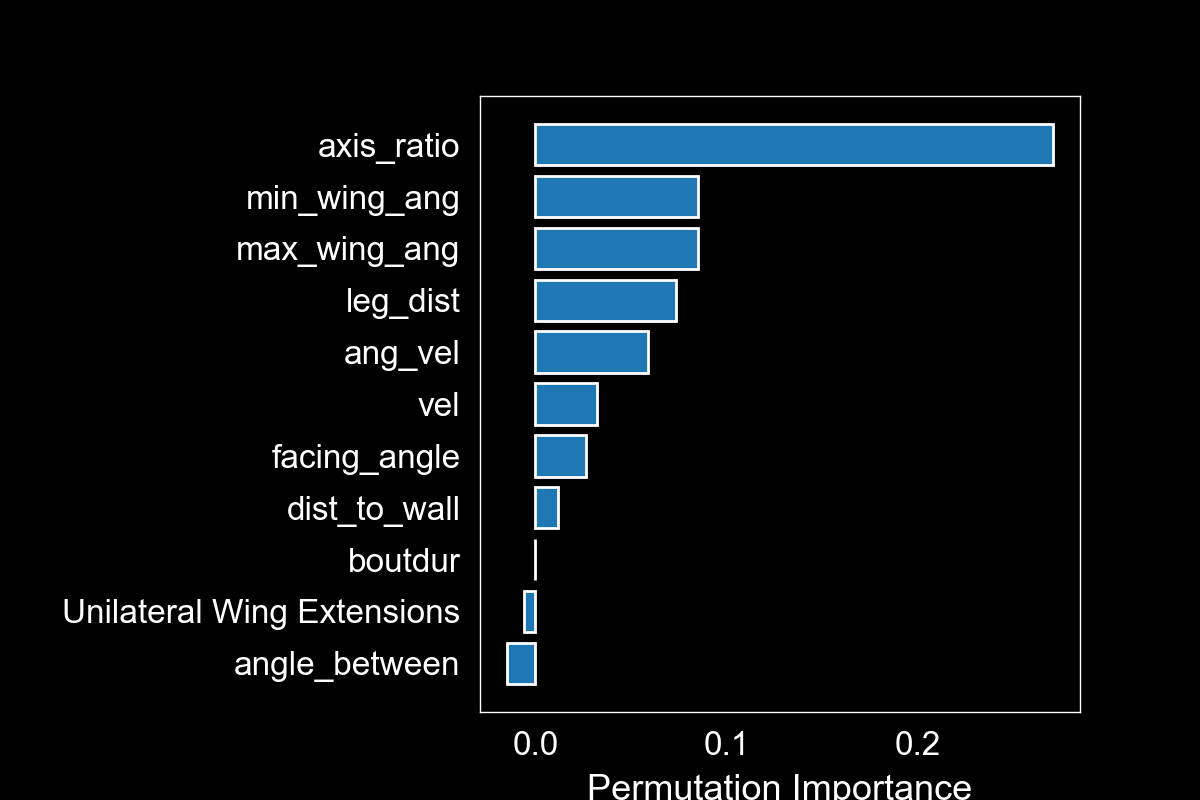

In [744]:
pl.figure()
sorted_idx = perm_importance.importances_mean.argsort()
pl.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
pl.xlabel("Permutation Importance")
pl.subplots_adjust(left=0.4)

In [516]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    #imp,names = zip([imp, names])
    pl.barh(range(len(names)), imp, align='center')
    pl.yticks(range(len(names)), names)
    pl.show()

<IPython.core.display.Javascript object>


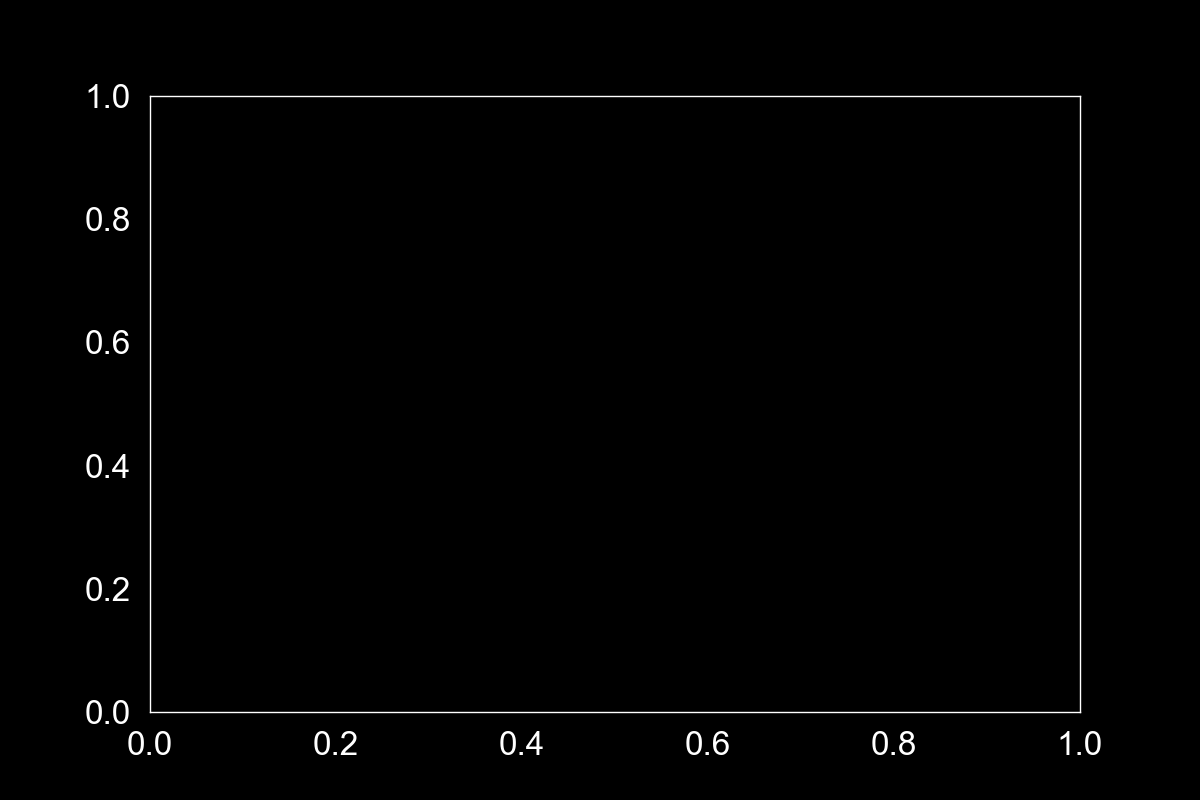

TypeError: only size-1 arrays can be converted to Python scalars

In [46]:
%matplotlib notebook
pl.figure()
pl.barh(range(len(names)), imp, align='center')
pl.yticks(range(len(names)), names)
pl.show()

In [67]:
print('hi')

In [37]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

In [48]:
feature_names